# Cross-validation Agenda
We would use this technique when we want to test what parameters would make the best model, or help us pick the best model for our dataset. For example, CV can help us answer the following question: would a linear model, or a quadratic model fit this dataset better? Unfortunately I don't fully understand how to use this for a timecourse dataset.

* LOOCV
* 10-fold CV

# Looking at the data

In [6]:
library(MASS)
library(ISLR)
library(boot)

In [16]:
??cv.glm

R Information

Help files with alias or concept or title matching ‘cv.glm’ using
regular expression matching:


boot::cv.glm            Cross-validation for Generalized Linear Models
  Aliases: cv.glm
broom::glance.cv.glmnet
                        Glance at a(n) cv.glmnet object
  Aliases: glance.cv.glmnet
broom::tidy.cv.glmnet   Tidy a(n) cv.glmnet object
  Aliases: tidy.cv.glmnet


Type '?PKG::FOO' to inspect entries 'PKG::FOO', or 'TYPE?PKG::FOO' for
entries like 'PKG::FOO-TYPE'.




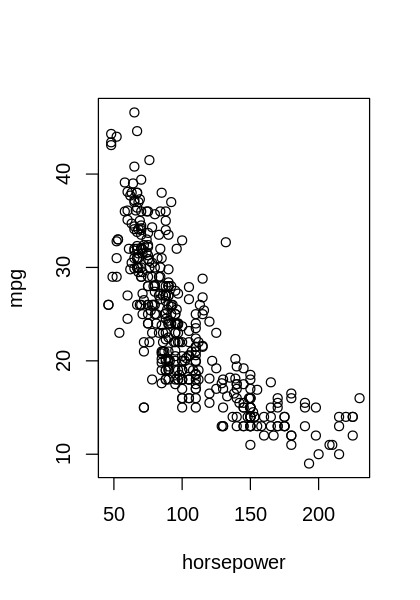

In [34]:
options(repr.plot.height = 5, repr.plot.width = 3.5)
plot(mpg~horsepower,data=Auto)

# LOOCV 
Leave one out cross validation example.


LOOCV algorithm: Fits model n times (1 for each of n observations) leaves one out, makes a fit, then makes a prediction. cv.glm does so by brute force, creating different fits every time as oppose to a calculation. Gives us two numbers. The first is raw LOO cross validation result, and the second is biased correction number, which corrects for making a fit using n-1 rather than n observations. 

In [20]:
glm.fit = glm(mpg~horsepower, data = Auto)
cv.glm(Auto, glm.fit)$delta

[1] 24.23151 24.23114

The cv.glm is computationally expensive. Brute force/manually computes the residuals and sums them, but we have a formula for that! **(ONLY FOR LM, NO LOGISTIC OR OTHER MODELS)**

$\frac{1}{n}\sum \limits _{i=1} ^n \frac{(y_i - \hat y_i)^2}{(1-H_{ii})^2}$

This formula is saying that we get the average residual of our best fit line, where every points residual is weight by a $1-H{ii}$ term, which, according to Trevor from the StatsLearningCourse on edX, can be thought of the importance of that point to the fit. The more important the point, the larger the H, the smaller the denominator, the more penalty we assume leaving this point out. Using this formula we can bypass the computations of ```cv.glm()``` and calculate the error directly! 

In [21]:
loocv <- function(fit){
    h <- lm.influence(fit)$h # Pulls out our h values as a vector
    mean((residuals(fit)/(1-h))^2)
}

Testing it out gives us the exact same value as ```cv.glm()```!

In [22]:
loocv(glm.fit)

[1] 24.23151

## Using loocv to select the best model

Fit polynomials of different degrees in a for loop, and select the model with the lowest cv.error

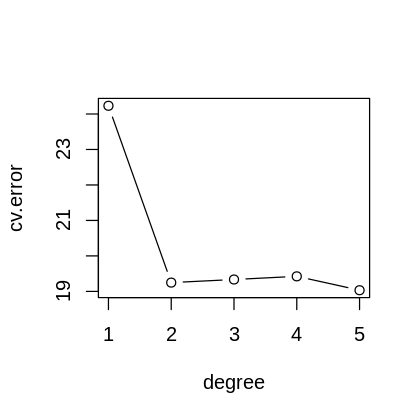

In [37]:
options(repr.plot.height = 3.5, repr.plot.width = 3.5)
cv.error <- rep(0,5)
degree <- 1:5
for(d in degree) {
    glm.fit <- glm(mpg ~ poly(horsepower, d), data=Auto)
    cv.error[d] <- loocv(glm.fit)
}

plot(degree, cv.error, type='b')

# 10-fold CV

We need to do much less work. Divide data into 10 pieces, 9/10 are training, 1/10 is validation under the condition of independance. Here we can use the ```cv.glm()``` and it should be quick because it will only do the calculation 10 times rather than n.

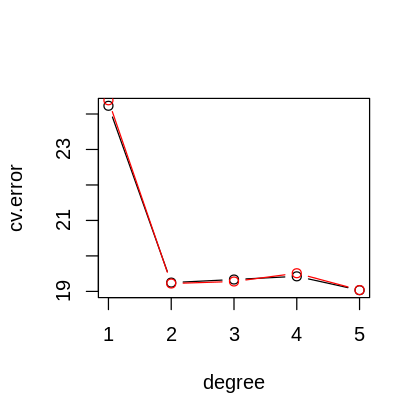

In [39]:
cv.error10 <- rep(0,5)
for(d in degree){
    glm.fit <- glm(mpg ~ poly(horsepower,d), data=Auto)
    cv.error10[d] <- cv.glm(Auto, glm.fit, K = 10)$delta[1]
}
plot(degree, cv.error, type='b')
lines(degree, cv.error10, type='b', col='red')

# Conclusion
In this case 10-fold and LOOCV are virtually identical, but in general we like 10-fold over LOOCV because it is more generalizable and stable.